In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
from scipy.stats import rv_discrete
from math import sin, cos, pi, tan
#from icecream import ic
from random import choice, seed, randint

In [3]:
def vlen(self):
    return sum(self**2)**0.5


def rot_mat(angle):
    return np.array([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])


rot90 = rot_mat(pi/2)

def fig_by_dot_and_center(dot, center, n):
    mat = rot_mat(pi*2/n)
    dots = [dot-center]
    for _ in range(n-1):
        dots.append(mat@dots[-1])
    return np.array(dots)+center

def fig_by_two_dots(x, y, n=3):
    # 0) Найти длину стророны окружности
    x = np.array(x)
    y = np.array(y)
    l = vlen(x-y)
    figs = []
    # 1) Найдем радиус описаной окружности
    r = l/(2*tan(pi/n))
    
    # 2) Найдем центр отрезка
    sec_cent = (x + y)/2
    # Построим единичный вектор 
    uv = (x - sec_cent) / vlen(x - sec_cent)
    for i in (-1, 1):
        cir_cent = rot90@uv*r*i+sec_cent
        figs.append(fig_by_dot_and_center(x, cir_cent, n))
        
    return figs

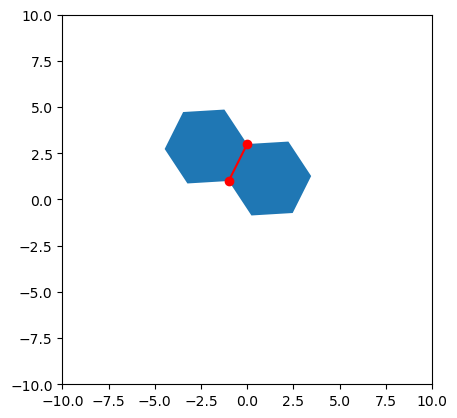

In [17]:
fig, ax = plt.subplots()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_aspect(1)

x = (-1, 1)

y = (0, 3)

figs = fig_by_two_dots(x, y, 6)
ax.plot(*zip(x, y), '-or')
f = Polygon(figs[0])
ax.add_patch(f)
f = Polygon(figs[1])
ax.add_patch(f)


In [5]:
def rand_side(all_figs):
    if not all_figs:
        return (-10, 0), (10, 0)
    fig = choice(all_figs)
    a = randint(0, len(fig)-1)
    b = (a + 1)%len(fig)

    return fig[a], fig[b]

In [6]:
def dif(fig, x, y):
    # True если точка внутри фигуры
    cors = fig
    center = cors.mean(0)
    l = ((cors - [x, y])**2).sum(axis=1)**0.5
    c = cors[np.argsort(l)]
    v = c[1] - c[0]
    if v[0] != 0:
        dot_shift = (x-c[0, 0])*v[1]/v[0]+c[0, 1] - y
        center_shift = (center[0]-c[0, 0])*v[1]/v[0]+c[0, 1] - center[1]
    else:
        dot_shift = x*v[0]/v[1]+c[0, 0] - x
        center_shift = center[1]*v[0]/v[1]+c[0, 0] - center[0]
    return dot_shift * center_shift > 0


def is_cross(fig1, fig2, key=False):
    for dot in fig1:
        if dif(fig2, *dot):
            return True

    for dot in fig2:
        if dif(fig1, *dot):
            return True

    side = vlen(fig1[0] - fig1[1])
    r1 = side/(2*tan(pi/len(fig1)))
    r2 = side/(2*tan(pi/len(fig2)))
    return (r1 + r2) > vlen(fig1.mean(0) - fig2.mean(0))


In [7]:
def cross(fig, figs):
    for f in figs:
        if is_cross(f, fig):
            return True
    return False

In [8]:
def draw(figs):
    fig, ax = plt.subplots()
    dots = np.vstack(figs)
    mx, my = dots.max(0)
    x, y = dots.min(0)
    ax.set_xlim([x, mx])
    ax.set_ylim([y, my])
    ax.set_aspect(1)
    for f in figs:
        ax.add_patch(Polygon(f, color=1-abs(np.random.random(4)-.5)))


In [9]:

def franc(n=3,sliv=0):
    S = 0
    all_figs = []
    while len(all_figs) != n:
        side = rand_side(all_figs)
        if sliv==0:
            t = choice([3, 4, 6])
        else:
            t=sliv
        f1, f2 = fig_by_two_dots(*side, t)
        s = {3: 3**.5*100, 4: 400, 6: 3**.5*600}[t]
        if not cross(f1, all_figs):
            all_figs.append(f1)
            S += s
        elif not cross(f2, all_figs):
            all_figs.append(f2)
            S += s
    lines = []
    for fig in all_figs:
        l = len(fig)
        for cor in range(l):
            d1 = tuple(map(lambda x: round(x, 3), fig[cor]))
            d2 = tuple(map(lambda x: round(x, 3), fig[cor-1]))
            line = tuple(sorted([d1, d2]))
            lines.append(line)
    P = len(list(filter(lambda x: lines.count(x) == 1, lines))) * 20
    print('Площадь:', S)
    print('Периметр:', P)
    draw(all_figs)


Площадь: 7196.152422706631
Периметр: 640


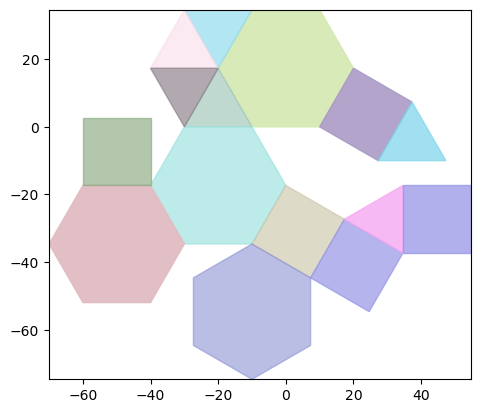

In [10]:
franc(15)